In [4]:
import pandas as pd

In [5]:
emotion_mapping = {
    "anger": "anger",
    "anticipation": "surprise", 
    "disgust": "disgust",
    "fear": "fear",
    "joy": "joy",
    "love": "joy",           
    "optimism": "joy",       
    "pessimism": "fear",     
    "sadness": "sadness",
    "surprise": "surprise",
    "trust": "joy"           
}

In [7]:
df = pd.read_csv('/work/ptyagi/masterthesis/data/predictions/predictions_tweet_text_cardiffnlp_twitter-roberta-large-emotion-latest.csv')

In [8]:
df['label'] = df['label'].map(emotion_mapping)

In [9]:
df.to_csv('/work/ptyagi/masterthesis/data/predictions/predictions_tweet_text_cardiffnlp_twitter-roberta-large-emotion-latest.csv', index=False)

In [10]:
df['label'].value_counts()

joy         4481
surprise    2984
disgust     1799
anger       1590
fear        1147
sadness      615
Name: label, dtype: int64

In [5]:
list(df['label'].unique())

['anger', 'joy', 'surprise', 'disgust', 'sadness', 'fear']

In [ ]:
df1 = pd.read_csv('/work/ptyagi/masterthesis/data/tmp/tweet_replies_feb_2019_en.csv')
df2 = pd.read_csv('/work/ptyagi/masterthesis/data/predictions/predictions_cardiffnlp_twitter-roberta-large-emotion-latest.csv')

In [5]:
df1.head()

,id,conversation_id,created_at,replies,tweet_text,tweet_lang,lang_confidence
0,1091717834860826624,1091717129995542528,2019-02-02 15:19:49+00:00,Go Trump!!,Energy Insider: Exploring the impact of winter...,en,0.742598
1,1092776979567468546,1092776506106015746,2019-02-05 13:28:29+00:00,eat local and grow local the ecosystem is buil...,Given how what we eat (demand) determines what...,en,0.901509
2,1092835036037087232,1092784983998189568,2019-02-05 17:19:11+00:00,TUMP,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,en,0.924515
3,1093139326496636928,1093132427810271233,2019-02-06 13:28:19+00:00,the sky is falling the sky in falling the corr...,See how Canada is addressing #ClimateChange th...,en,0.738337
4,1094072089672175622,1094070997135822848,2019-02-09 03:14:47+00:00,you are beyond demented the utter presumptuous...,You can kiss your beer goodbye if climate chan...,en,0.934737


In [12]:
df2.head()

,label,score
0,anger,0.972646
1,joy,0.980633
2,joy,0.700554
3,joy,0.954299
4,anger,0.993971


In [13]:
merged_df = pd.concat([df1, df2], axis=1)

In [14]:
df = merged_df[['id','conversation_id','replies','label','score']]

In [32]:
df.drop_duplicates(subset=['conversation_id'], inplace=True)

/tmp/ipykernel_672558/1557503410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['conversation_id'], inplace=True)


In [15]:
df.to_csv('/work/ptyagi/masterthesis/data/predictions/predictions_cardiffnlp_twitter-roberta-large-emotion-latest.csv', index=False)

In [16]:
import pandas as pd

In [44]:
df1 = pd.read_csv('/work/ptyagi/masterthesis/data/predictions/predictions_tweet_text_cardiffnlp_twitter-roberta-base-emotion-latest.csv')

In [45]:
df1.head(10)

,conversation_id,tweet_text,label,score
0,1091717129995542528,Energy Insider: Exploring the impact of winter...,surprise,0.477326
1,1092776506106015746,Given how what we eat (demand) determines what...,joy,0.921112
2,1092784983998189568,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,surprise,0.625566
3,1093132427810271233,See how Canada is addressing #ClimateChange th...,joy,0.972529
4,1094070997135822848,You can kiss your beer goodbye if climate chan...,anger,0.893602
5,1094859190756102145,CALL FOR VOLUNTEERS: We are calling for enviro...,surprise,0.923459
6,1094978046635978752,Opening ceremony of the 4th Lead Author Meetin...,joy,0.573996
7,1095649500658577409,Thank you Hugo Metz [USER] for sharing insight...,joy,0.988924
8,1095924262957928448,TV NIGHTS: Happy Valentine’s Day/Week!Read thi...,joy,0.978493
9,1095929051393343488,How climate change will impact US cities by 20...,surprise,0.887630


In [61]:
df1.query("conversation_id == 1100118750198710273")

,conversation_id,tweet_text,label,score
1288,1100118750198710273,Ocasio-Cortez asks if climate change means we ...,disgust,0.728963


In [10]:
df = pd.read_csv('/work/ptyagi/masterthesis/data/tmp/annotations_and_predictions.csv')

In [12]:
from sklearn.metrics import accuracy_score

def class_wise_accuracy(y_true, y_pred, labels):
    accuracies = {}
    for label in labels:
        indices = [i for i, true_label in enumerate(y_true) if true_label == label]
        y_true_label = [y_true[i] for i in indices]
        y_pred_label = [y_pred[i] for i in indices]
        accuracies[label] = accuracy_score(y_true_label, y_pred_label)
    return accuracies

In [13]:
df['manual_label'].value_counts()

manual_label
anger       33
joy         16
disgust     15
fear        13
sadness     12
surprise    10
Name: count, dtype: int64

In [27]:
df.query('emotion_confidence_roberta_base >= 0.9')['ekman_roberta_base'].value_counts()

ekman_roberta_base
anger       26
joy         18
disgust      9
fear         5
surprise     2
sadness      1
Name: count, dtype: int64

In [24]:
df.columns

Index(['id', 'manual_label', 'index', 'conversation_id', 'created_at',
       'replies', 'tweet_text', 'tweet_lang', 'lang_confidence',
       'reply_emotion_roberta_base', 'emotion_confidence_roberta_base',
       'reply_emotion_roberta_large', 'emotion_confidence_roberta_large',
       'reply_emotion_bart', 'emotion_confidence_bart',
       'top_3_labels_roberta_base', 'top_3_scores_roberta_base',
       'top_3_labels_roberta_large', 'top_3_scores_roberta_large',
       'top_3_labels_bart', 'top_3_scores_bart', 'top_3_labels_deberta_xnli',
       'top_3_scores_deberta_xnli', 'top_3_labels_deberta_zero',
       'top_3_scores_deberta_zero', 'ekman_roberta_base',
       'ekman_roberta_large', 'ekman_deberta_zero', 'ekman_bart',
       'ekman_deberta_xnli'],
      dtype='object')

In [14]:
y_true = df['manual_label'].to_list()
labels = ["anger", "surprise", "joy", "disgust", "fear", "sadness"]
y_pred = df['ekman_roberta_base'].to_list()
class_accuracy = class_wise_accuracy(y_true, y_pred, labels)
print("Class-wise Accuracy:", class_accuracy)

Class-wise Accuracy: {'anger': 0.6666666666666666, 'surprise': 0.4, 'joy': 0.875, 'disgust': 0.26666666666666666, 'fear': 0.3076923076923077, 'sadness': 0.08333333333333333}


In [15]:
y_pred = df['ekman_roberta_large'].to_list()
class_accuracy = class_wise_accuracy(y_true, y_pred, labels)
print("Class-wise Accuracy:", class_accuracy)

Class-wise Accuracy: {'anger': 0.45454545454545453, 'surprise': 0.5, 'joy': 0.9375, 'disgust': 0.6, 'fear': 0.3076923076923077, 'sadness': 0.16666666666666666}


In [16]:
df1 = pd.read_csv('/work/ptyagi/masterthesis/data/predictions/predictions_cardiffnlp_twitter-roberta-base-emotion-latest.csv')

In [28]:
df1.query('score >=0.9')['label'].value_counts()

label
anger       2485
joy         2047
disgust      875
sadness      441
fear         308
surprise     164
Name: count, dtype: int64

In [49]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

model_path = "/work/ptyagi/masterthesis/models/exp0"
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

# Move model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Example test data with string labels
test_texts = df['replies'].to_list()
test_labels = df['manual_label'].to_list()

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(test_labels)  # Fit and transform labels

# Define the test dataset
class TestDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = self.texts[item]
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Create DataLoader for test data
test_dataset = TestDataset(test_texts, encoded_labels, tokenizer)
test_loader = DataLoader(test_dataset, batch_size=16)


In [ ]:
model.eval()

# Initialize lists to store results
all_preds = []
all_labels = []
all_confidences = []
all_logits = []

# Make predictions and store logits, confidences, and labels
with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        confidences = torch.softmax(logits, dim=1)
        
        preds = torch.argmax(logits, dim=1)
        
        # Append to lists
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_confidences.extend(confidences.max(dim=1).values.cpu().numpy())  # Max confidence for predicted class
        all_logits.extend(logits.cpu().numpy())

# Calculate overall accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate class-wise accuracy
report = classification_report(all_labels, all_preds, target_names=label_encoder.classes_, output_dict=True)
classwise_accuracy = {label: report[label]['precision'] for label in report if label in label_encoder.classes_}
print("Class-wise Accuracy:", classwise_accuracy)

# Store predictions, confidence scores, and logits in a DataFrame
results_df = pd.DataFrame({
    "Text": test_texts,
    "True Label": label_encoder.inverse_transform(all_labels),
    "Predicted Label": label_encoder.inverse_transform(all_preds),
    "Confidence Score": all_confidences,
    "Logits": all_logits
})

results_df.to_csv('bert_predictions_test.csv')

100%|██████████| 7/7 [00:00<00:00,  9.25it/s]

Test Accuracy: 0.5354
Class-wise Accuracy: {'anger': 0.7142857142857143, 'disgust': 0.26666666666666666, 'fear': 0.5, 'joy': 0.5384615384615384, 'sadness': 0.5, 'surprise': 0.38461538461538464}


In [50]:
model.eval()

# Initialize lists to store results
all_preds = []
all_labels = []
all_confidences = []
all_logits = []

# Make predictions and store logits, confidences, and labels
with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        confidences = torch.softmax(logits, dim=1)
        
        preds = torch.argmax(logits, dim=1)
        
        # Append to lists
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_confidences.extend(confidences.max(dim=1).values.cpu().numpy())  # Max confidence for predicted class
        all_logits.extend(logits.cpu().numpy())

# Calculate overall accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate class-wise accuracy
report = classification_report(all_labels, all_preds, target_names=label_encoder.classes_, output_dict=True)
classwise_accuracy = {label: report[label]['precision'] for label in report if label in label_encoder.classes_}
print("Class-wise Accuracy:", classwise_accuracy)

# Store predictions, confidence scores, and logits in a DataFrame
results_df = pd.DataFrame({
    "Text": test_texts,
    "True Label": label_encoder.inverse_transform(all_labels),
    "Predicted Label": label_encoder.inverse_transform(all_preds),
    "Confidence Score": all_confidences,
    "Logits": all_logits
})

results_df.to_csv('bert_baseline_predictions_test.csv')

100%|██████████| 7/7 [00:00<00:00,  9.24it/s]

Test Accuracy: 0.5051
Class-wise Accuracy: {'anger': 0.7586206896551724, 'disgust': 0.2727272727272727, 'fear': 0.5714285714285714, 'joy': 0.4827586206896552, 'sadness': 0.5, 'surprise': 0.3}


In [13]:
df=pd.read_csv('/work/ptyagi/masterthesis/data/tmp/multi_label_predictions_feb_2019_en.csv')

In [7]:
import ast

In [14]:
df['top_3_labels_roberta_base'] = df['top_3_labels_roberta_base'].apply(ast.literal_eval)

In [15]:
df['top_3_labels_roberta_large'] = df['top_3_labels_roberta_large'].apply(ast.literal_eval)

In [16]:
df['top_3_labels_roberta_base_ekman'] = df['top_3_labels_roberta_base'].apply(lambda x: tuple(emotion_mapping[emotion] for emotion in x))


In [17]:
df['top_3_labels_roberta_large_ekman'] = df['top_3_labels_roberta_large'].apply(lambda x: tuple(emotion_mapping[emotion] for emotion in x))

In [18]:
df

,id,conversation_id,created_at,replies,tweet_text,tweet_lang,lang_confidence,reply_emotion_roberta_base,emotion_confidence_roberta_base,reply_emotion_roberta_large,...,top_3_labels_roberta_large,top_3_scores_roberta_large,top_3_labels_bart,top_3_scores_bart,top_3_labels_deberta_xnli,top_3_scores_deberta_xnli,top_3_labels_deberta_zero,top_3_scores_deberta_zero,top_3_labels_roberta_base_ekman,top_3_labels_roberta_large_ekman
0,1091717834860826624,1091717129995542528,2019-02-02 15:19:49+00:00,Go Trump!!,Energy Insider: Exploring the impact of winter...,en,0.742598,anger,0.962685,anger,...,"(anger, disgust, joy)","(0.9726458191871643, 0.8819092512130737, 0.165...","('optimism', 'joy', 'surprise')","(0.9860696196556091, 0.9570428133010864, 0.352...","('anger', 'pessimism', 'anticipation')","(0.9397512078285217, 0.7404451966285706, 0.699...","('optimism', 'joy', 'love')","(0.9535680413246155, 0.8632389307022095, 0.027...","(anger, disgust, joy)","(anger, disgust, joy)"
1,1092776979567468546,1092776506106015746,2019-02-05 13:28:29+00:00,eat local and grow local the ecosystem is buil...,Given how what we eat (demand) determines what...,en,0.901509,optimism,0.983526,optimism,...,"(optimism, joy, anticipation)","(0.9806329607963562, 0.7929828763008118, 0.226...","('optimism', 'trust', 'joy')","(0.37900763750076294, 0.13457684218883514, 0.1...","('optimism', 'anticipation', 'trust')","(0.9980084896087646, 0.9324053525924683, 0.635...","('optimism', 'anticipation', 'joy')","(0.7586331963539124, 0.029885094612836838, 0.0...","(joy, joy, joy)","(joy, joy, surprise)"
2,1092835036037087232,1092784983998189568,2019-02-05 17:19:11+00:00,TUMP,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,en,0.924515,anger,0.352324,joy,...,"(joy, anticipation, anger)","(0.700554370880127, 0.14450152218341827, 0.116...","('pessimism', 'surprise', 'anger')","(0.7269492745399475, 0.23788031935691833, 0.19...","('anticipation', 'sadness', 'pessimism')","(0.8244761228561401, 0.8120061755180359, 0.761...","('surprise', 'sadness', 'pessimism')","(0.9842405915260315, 0.947125256061554, 0.9407...","(anger, disgust, surprise)","(joy, surprise, anger)"
3,1093139326496636928,1093132427810271233,2019-02-06 13:28:19+00:00,the sky is falling the sky in falling the corr...,See how Canada is addressing #ClimateChange th...,en,0.738337,optimism,0.838999,joy,...,"(joy, anger, disgust)","(0.9542987942695618, 0.3874838948249817, 0.311...","('pessimism', 'fear', 'disgust')","(0.9699257016181946, 0.7580270171165466, 0.584...","('anticipation', 'anger', 'pessimism')","(0.990196704864502, 0.9716505408287048, 0.9461...","('pessimism', 'joy', 'anticipation')","(0.9711204767227173, 0.44248026609420776, 0.25...","(joy, joy, anger)","(joy, anger, disgust)"
4,1094072089672175622,1094070997135822848,2019-02-09 03:14:47+00:00,you are beyond demented the utter presumptuous...,You can kiss your beer goodbye if climate chan...,en,0.934737,anger,0.985042,anger,...,"(anger, disgust, sadness)","(0.9939709901809692, 0.9895362854003906, 0.089...","('disgust', 'pessimism', 'anger')","(0.9831241369247437, 0.9732086658477783, 0.950...","('disgust', 'sadness', 'anger')","(0.9992107152938843, 0.9980917572975159, 0.989...","('anger', 'disgust', 'pessimism')","(0.9984543323516846, 0.9859429597854614, 0.079...","(anger, disgust, sadness)","(anger, disgust, sadness)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12611,1101270343597998080,1101215748305944576,2019-02-28 23:58:05+00:00,i do not see them moving over is there a repub...,"For an embarrassingly long time, Dems used “sc...",en,0.895219,anticipation,0.636793,anticipation,...,"(anticipation, disgust, surprise)","(0.5433971285820007, 0.46782034635543823, 0.32...","('surprise', 'pessimism', 'trust')","(0.987078070640564, 0.9484825730323792, 0.6509...","('pessimism', 'sadness', 'anticipation')","(0.7139500975608826, 0.6268747448921204, 0.526...","('pessimism', 'surprise', 'fear')","(0.9251582026481628, 0.02681848

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

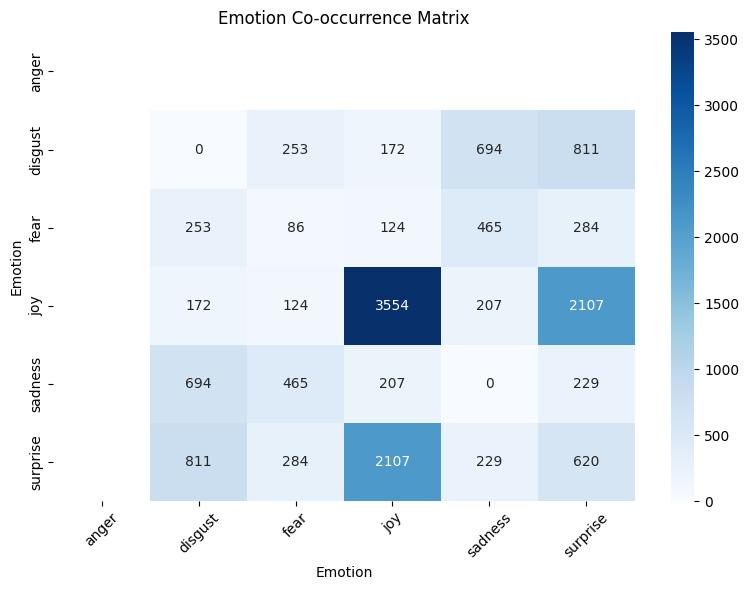

In [25]:
df['top_2_base'] = df['top_3_labels_roberta_base_ekman'].apply(lambda x: x[:2])

# Flatten the list of top 2 pairs
pairs = [tuple(sorted(pair)) for pair in df['top_2_base']]

# Create a DataFrame for co-occurrence counting
pair_df = pd.DataFrame(pairs, columns=['emotion1', 'emotion2'])

# Create a co-occurrence matrix
co_occurrence = pd.crosstab(pair_df['emotion1'], pair_df['emotion2'])

# Fill in symmetrical values for the matrix
co_occurrence = co_occurrence + co_occurrence.T

# Plot the heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence, annot=True, fmt="g", cmap="Blues")
plt.title('Emotion Co-occurrence Matrix')
plt.xlabel('Emotion')
plt.ylabel('Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

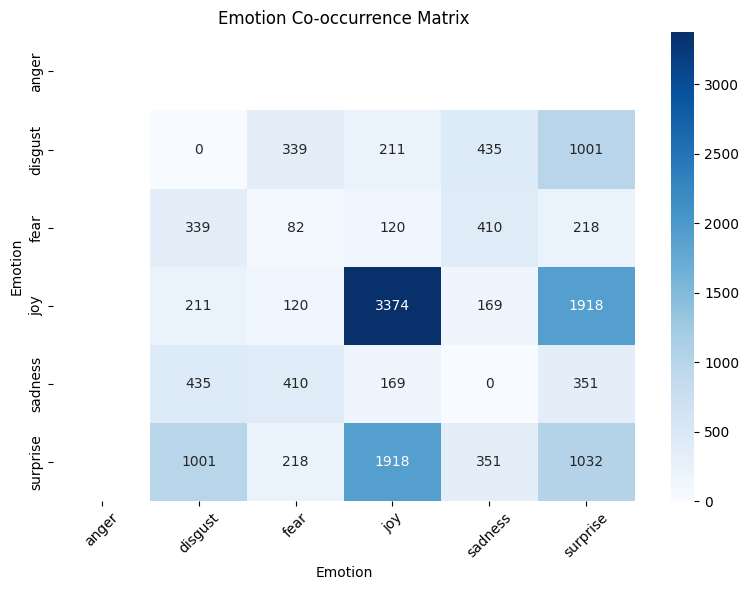

In [27]:
df['top_2_large'] = df['top_3_labels_roberta_large_ekman'].apply(lambda x: x[:2])

# Flatten the list of top 2 pairs
pairs = [tuple(sorted(pair)) for pair in df['top_2_large']]

# Create a DataFrame for co-occurrence counting
pair_df = pd.DataFrame(pairs, columns=['emotion1', 'emotion2'])

# Create a co-occurrence matrix
co_occurrence = pd.crosstab(pair_df['emotion1'], pair_df['emotion2'])

# Fill in symmetrical values for the matrix
co_occurrence = co_occurrence + co_occurrence.T

# Plot the heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence, annot=True, fmt="g", cmap="Blues")
plt.title('Emotion Co-occurrence Matrix')
plt.xlabel('Emotion')
plt.ylabel('Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import ast

emotion_mapping = {
    "anger": "anger",
    "anticipation": "surprise", 
    "disgust": "disgust",
    "fear": "fear",
    "joy": "joy",
    "love": "joy",           
    "optimism": "joy",       
    "pessimism": "fear",     
    "sadness": "sadness",
    "surprise": "surprise",
    "trust": "joy"           
}

df = pd.read_csv('/work/ptyagi/masterthesis/data/predictions/predictions_tweet_text_cardiffnlp_twitter-roberta-large-emotion-latest_merged.csv')

def process_predictions(predictions):
    predictions = ast.literal_eval(predictions)
    
    mapped_scores = {new_emotion: 0 for new_emotion in set(emotion_mapping.values())}
    
    for emotion, score in predictions:
        mapped_emotion = emotion_mapping[emotion]
        mapped_scores[mapped_emotion] += score
    
    total_score = sum(mapped_scores.values())
    normalized_scores = {emotion: score / total_score for emotion, score in mapped_scores.items()}
    
    return list(normalized_scores.items())

df['mapped_predictions'] = df['roberta-large-predictions'].apply(process_predictions)

df.to_csv('/work/ptyagi/masterthesis/data/predictions/predictions_tweet_text_cardiffnlp_twitter-roberta-large-emotion-latest_merged.csv', index=False)


In [7]:
df.head()

,id,conversation_id,created_at,replies,tweet_text,tweet_lang,lang_confidence,roberta-large-predictions,mapped_predictions
0,1091717834860826624,1091717129995542528,2019-02-02 15:19:49+00:00,Go Trump!!,Energy Insider: Exploring the impact of winter...,en,0.742598,"[('anticipation', 0.578892707824707), ('sadnes...","[('fear', 0.10359434079474628), ('disgust', 0...."
1,1092776979567468546,1092776506106015746,2019-02-05 13:28:29+00:00,eat local and grow local the ecosystem is buil...,Given how what we eat (demand) determines what...,en,0.901509,"[('optimism', 0.9701303839683533), ('anticipat...","[('fear', 0.0447722249566507), ('disgust', 0.0..."
2,1092835036037087232,1092784983998189568,2019-02-05 17:19:11+00:00,TUMP,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,en,0.924515,"[('anticipation', 0.6292991638183594), ('sadne...","[('fear', 0.03833197220923056), ('disgust', 0...."
3,1093139326496636928,1093132427810271233,2019-02-06 13:28:19+00:00,the sky is falling the sky in falling the corr...,See how Canada is addressing #ClimateChange th...,en,0.738337,"[('optimism', 0.9395819306373596), ('anticipat...","[('fear', 0.019849522251128075), ('disgust', 0..."
4,1094072089672175622,1094070997135822848,2019-02-09 03:14:47+00:00,you are beyond demented the utter presumptuous...,You can kiss your beer goodbye if climate chan...,en,0.934737,"[('sadness', 0.45861831307411194), ('disgust',...","[('fear', 0.22188846303966933), ('disgust', 0...."


In [8]:
import matplotlib.pyplot as plt
from collections import Counter


In [9]:
df.drop_duplicates(subset="conversation_id", inplace=True)

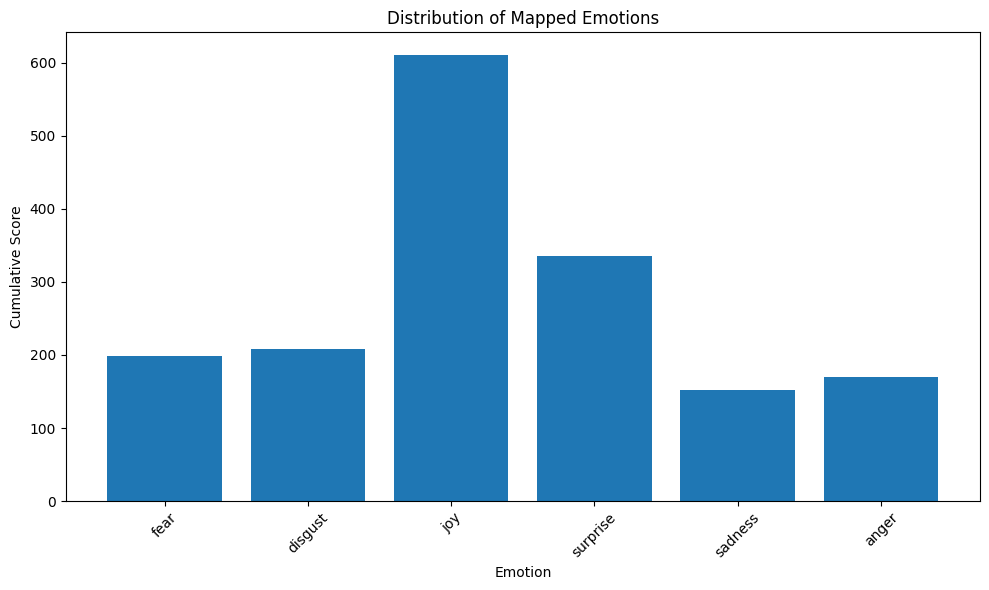

In [10]:
def extract_and_aggregate(predictions_column):
    # Flatten the list of tuples for all rows in the DataFrame
    all_predictions = []
    for mapped_predictions in predictions_column:
        # Ensure the input is treated as a list
        if isinstance(mapped_predictions, str):
            mapped_predictions = eval(mapped_predictions)  # Convert string back to list of tuples if necessary
        all_predictions.extend(mapped_predictions)
    
    # Aggregate scores for each emotion
    aggregated_scores = Counter()
    for emotion, score in all_predictions:
        aggregated_scores[emotion] += score
    
    return aggregated_scores

# Aggregate mapped predictions from the 'mapped_predictions' column
aggregated_scores = extract_and_aggregate(df['mapped_predictions'])

# Prepare data for plotting
emotions = list(aggregated_scores.keys())
scores = list(aggregated_scores.values())

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(emotions, scores)
plt.title('Distribution of Mapped Emotions')
plt.xlabel('Emotion')
plt.ylabel('Cumulative Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

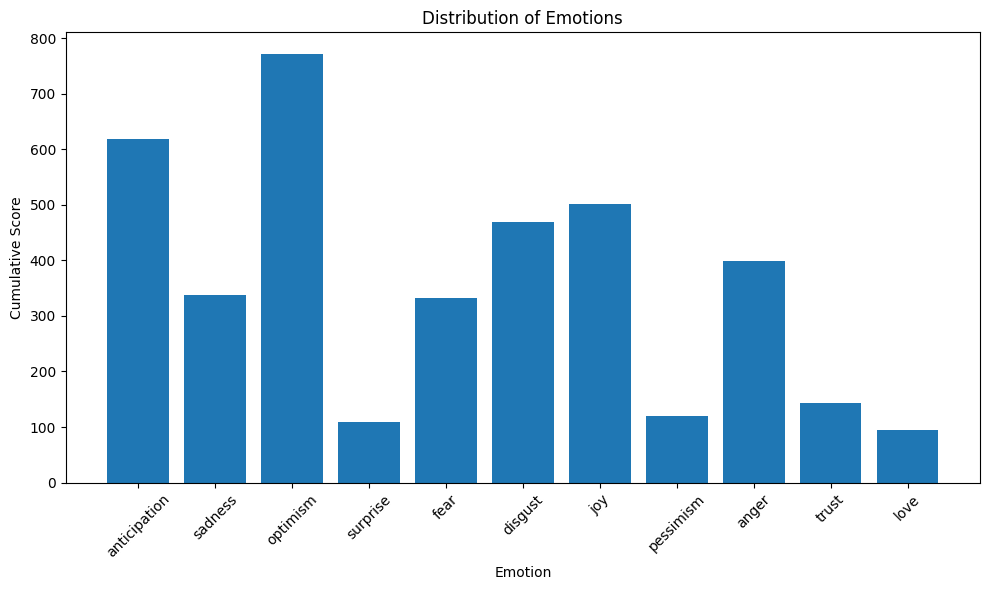

In [11]:
aggregated_scores = extract_and_aggregate(df['roberta-large-predictions'])

# Prepare data for plotting
emotions = list(aggregated_scores.keys())
scores = list(aggregated_scores.values())

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(emotions, scores)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Cumulative Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

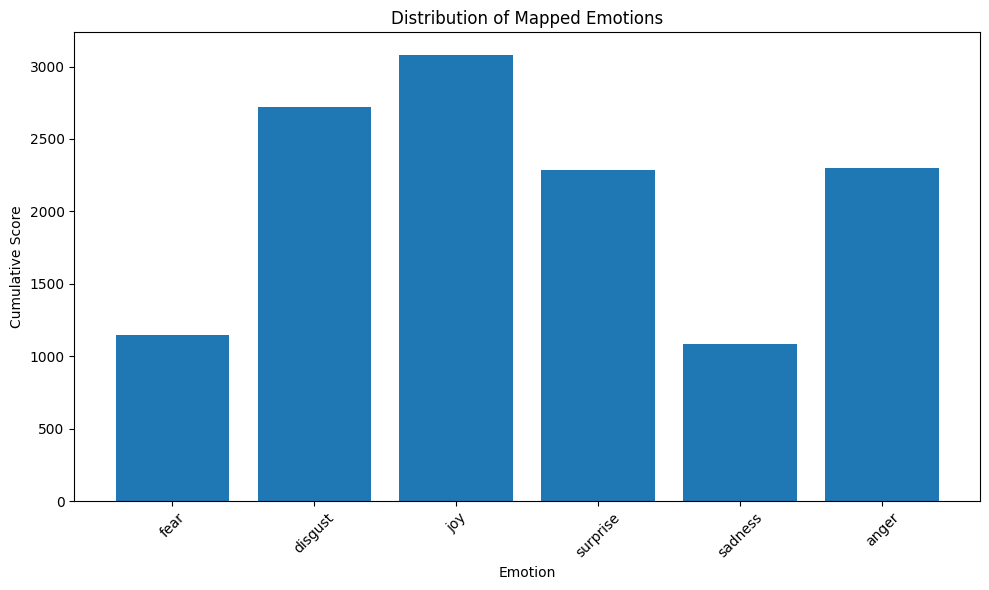

In [ ]:
df = pd.read_csv('/work/ptyagi/masterthesis/data/predictions/predictions_replies_cardiffnlp_twitter-roberta-large-emotion-latest_merged.csv')

# Aggregate mapped predictions from the 'mapped_predictions' column
aggregated_scores = extract_and_aggregate(df['mapped_predictions'])

# Prepare data for plotting
emotions = list(aggregated_scores.keys())
scores = list(aggregated_scores.values())

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(emotions, scores)
plt.title('Distribution of Mapped Emotions')
plt.xlabel('Emotion')
plt.ylabel('Cumulative Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

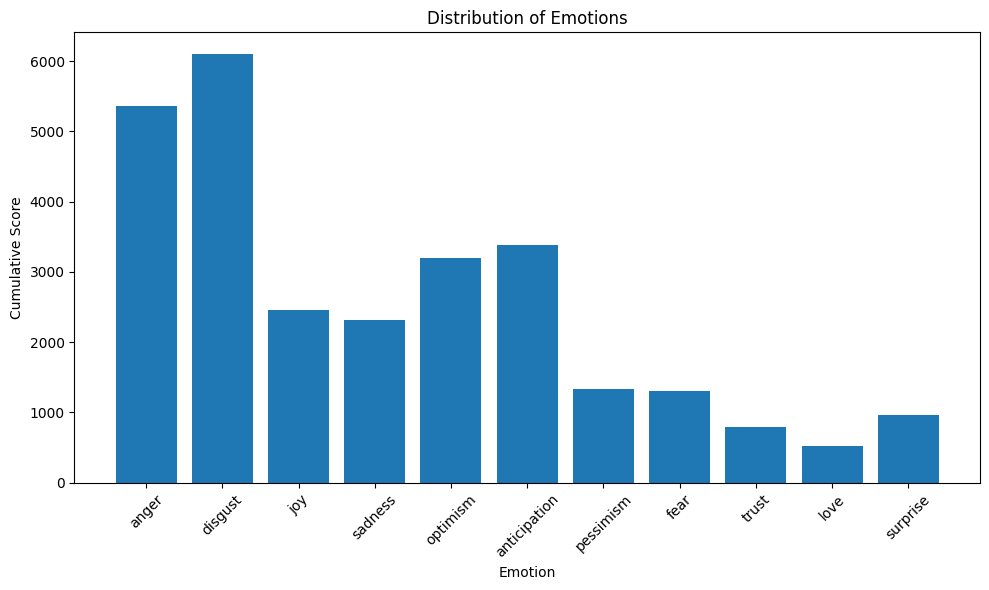

In [17]:
aggregated_scores = extract_and_aggregate(df['roberta-large-predictions'])

# Prepare data for plotting
emotions = list(aggregated_scores.keys())
scores = list(aggregated_scores.values())

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(emotions, scores)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Cumulative Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from collections import defaultdict

def aggregate_predictions(df):
    aggregated_scores = defaultdict(lambda: defaultdict(float))
    count_by_id = defaultdict(int)

    for _, row in df.iterrows():
        unique_id = row['conversation_id']
        predictions = ast.literal_eval(row['mapped_predictions']) 
        
        for emotion, score in predictions:
            aggregated_scores[unique_id][emotion] += score
        count_by_id[unique_id] += 1

    averaged_predictions = []
    for unique_id, scores in aggregated_scores.items():
        averaged_scores = [(emotion, score / count_by_id[unique_id]) for emotion, score in scores.items()]
        averaged_predictions.append((unique_id, averaged_scores))
    
    return pd.DataFrame(averaged_predictions, columns=['conversation_id', 'averaged_predictions'])

df= pd.read_csv('/work/ptyagi/masterthesis/data/predictions/predictions_replies_cardiffnlp_twitter-roberta-large-emotion-latest_merged.csv')

result_df = aggregate_predictions(df)


In [33]:
result_df

,conversation_id,averaged_predictions
0,1091717129995542528,"[(fear, 0.017308233914370762), (disgust, 0.395..."
1,1092776506106015746,"[(fear, 0.005125462871671195), (disgust, 0.004..."
2,1092784983998189568,"[(fear, 0.008546253234571035), (disgust, 0.034..."
3,1093132427810271233,"[(fear, 0.07394002448004584), (disgust, 0.1342..."
4,1094070997135822848,"[(fear, 0.026252819823070976), (disgust, 0.446..."
...,...,...
1668,1101265867353018368,"[(fear, 0.09988554577698083), (disgust, 0.2790..."
1669,1101266038451249153,"[(fear, 0.13879329329794768), (disgust, 0.1433..."
1670,1101266578958622721,"[(fear, 0.36420214094961867), (disgust, 0.2414..."
1671,1101267541106794502,"[(fear, 0.028083219885029084), (disgust, 0.416..."


In [40]:
df = pd.read_csv('/work/ptyagi/masterthesis/data/predictions/predictions_tweet_text_cardiffnlp_twitter-roberta-large-emotion-latest_merged.csv')

In [46]:
merged_df = pd.merge(df.drop_duplicates(subset='conversation_id'), result_df, on='conversation_id')
merged_df[['conversation_id','tweet_text','roberta-large-predictions','mapped_predictions','averaged_predictions']].to_csv('/work/ptyagi/masterthesis/data/predictions/averaged_predictions.csv', index=False)

In [47]:
merged_df.head()

,id,conversation_id,created_at,replies,tweet_text,tweet_lang,lang_confidence,roberta-large-predictions,mapped_predictions,averaged_predictions
0,1091717834860826624,1091717129995542528,2019-02-02 15:19:49+00:00,Go Trump!!,Energy Insider: Exploring the impact of winter...,en,0.742598,"[('anticipation', 0.578892707824707), ('sadnes...","[('fear', 0.10359434079474628), ('disgust', 0....","[(fear, 0.017308233914370762), (disgust, 0.395..."
1,1092776979567468546,1092776506106015746,2019-02-05 13:28:29+00:00,eat local and grow local the ecosystem is buil...,Given how what we eat (demand) determines what...,en,0.901509,"[('optimism', 0.9701303839683533), ('anticipat...","[('fear', 0.0447722249566507), ('disgust', 0.0...","[(fear, 0.005125462871671195), (disgust, 0.004..."
2,1092835036037087232,1092784983998189568,2019-02-05 17:19:11+00:00,TUMP,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,en,0.924515,"[('anticipation', 0.6292991638183594), ('sadne...","[('fear', 0.03833197220923056), ('disgust', 0....","[(fear, 0.008546253234571035), (disgust, 0.034..."
3,1093139326496636928,1093132427810271233,2019-02-06 13:28:19+00:00,the sky is falling the sky in falling the corr...,See how Canada is addressing #ClimateChange th...,en,0.738337,"[('optimism', 0.9395819306373596), ('anticipat...","[('fear', 0.019849522251128075), ('disgust', 0...","[(fear, 0.07394002448004584), (disgust, 0.1342..."
4,1094072089672175622,1094070997135822848,2019-02-09 03:14:47+00:00,you are beyond demented the utter presumptuous...,You can kiss your beer goodbye if climate chan...,en,0.934737,"[('sadness', 0.45861831307411194), ('disgust',...","[('fear', 0.22188846303966933), ('disgust', 0....","[(fear, 0.026252819823070976), (disgust, 0.446..."


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/work/ptyagi/masterthesis/data/predictions/averaged_predictions.csv')

In [4]:
df

,conversation_id,tweet_text,roberta-large-predictions,mapped_predictions,averaged_predictions
0,1091717129995542528,Energy Insider: Exploring the impact of winter...,"[('anticipation', 0.578892707824707), ('sadnes...","[('fear', 0.10359434079474628), ('disgust', 0....","[('fear', 0.017308233914370762), ('disgust', 0..."
1,1092776506106015746,Given how what we eat (demand) determines what...,"[('optimism', 0.9701303839683533), ('anticipat...","[('fear', 0.0447722249566507), ('disgust', 0.0...","[('fear', 0.005125462871671195), ('disgust', 0..."
2,1092784983998189568,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,"[('anticipation', 0.6292991638183594), ('sadne...","[('fear', 0.03833197220923056), ('disgust', 0....","[('fear', 0.008546253234571035), ('disgust', 0..."
3,1093132427810271233,See how Canada is addressing #ClimateChange th...,"[('optimism', 0.9395819306373596), ('anticipat...","[('fear', 0.019849522251128075), ('disgust', 0...","[('fear', 0.07394002448004584), ('disgust', 0...."
4,1094070997135822848,You can kiss your beer goodbye if climate chan...,"[('sadness', 0.45861831307411194), ('disgust',...","[('fear', 0.22188846303966933), ('disgust', 0....","[('fear', 0.026252819823070976), ('disgust', 0..."
...,...,...,...,...,...
1668,1101265867353018368,Time for some climate change chat #bbcqt [URL],"[('anticipation', 0.9094414710998535), ('joy',...","[('fear', 0.012202991674703656), ('disgust', 0...","[('fear', 0.09988554577698083), ('disgust', 0...."
1669,1101266038451249153,\Our planet is dying. In 12 years it will be t...,"[('fear', 0.5158825516700745), ('disgust', 0.4...","[('fear', 0.26454052218073015), ('disgust', 0....","[('fear', 0.13879329329794768), ('disgust', 0...."
1670,1101266578958622721,Governor pushes climate change fight but holds...,"[('sadness', 0.3396046757698059), ('anticipati...","[('fear', 0.06838281398712756), ('disgust', 0....","[('fear', 0.36420214094961867), ('disgust', 0...."
1671,1101267541106794502,Young Tory gammon snuck in to the #bbcqt audie...,"[('disgust', 0.8352463841438293), ('anger', 0....","[('fear', 0.037382652558502885), ('disgust', 0...","[('fear', 0.028083219885029084), ('disgust', 0..."


In [12]:
sum = 0
for i in eval(df['averaged_predictions'][0]):
    sum += i[1]
print(sum)

1.0


In [32]:
import numpy as np
from scipy.spatial.distance import cosine

def parse_predictions(predictions):
    return dict(eval(predictions))

def calculate_cosine_similarity(pred1, pred2):
    emotions = sorted(set(pred1.keys()).union(set(pred2.keys())))
    vec1 = np.array([pred1.get(emotion, 0) for emotion in emotions])
    vec2 = np.array([pred2.get(emotion, 0) for emotion in emotions])
    return 1 - cosine(vec1, vec2)  

In [ ]:
df['cosine_similarity'] = df.apply(
    lambda row: calculate_cosine_similarity(
        parse_predictions(row['averaged_predictions']),
        parse_predictions(row['mapped_predictions'])
    ),
    axis=1
)

In [14]:
df

,conversation_id,tweet_text,roberta-large-predictions,mapped_predictions,averaged_predictions,cosine_similarity
0,1091717129995542528,Energy Insider: Exploring the impact of winter...,"[('anticipation', 0.578892707824707), ('sadnes...","[('fear', 0.10359434079474628), ('disgust', 0....","[('fear', 0.017308233914370762), ('disgust', 0...",0.169931
1,1092776506106015746,Given how what we eat (demand) determines what...,"[('optimism', 0.9701303839683533), ('anticipat...","[('fear', 0.0447722249566507), ('disgust', 0.0...","[('fear', 0.005125462871671195), ('disgust', 0...",0.927457
2,1092784983998189568,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,"[('anticipation', 0.6292991638183594), ('sadne...","[('fear', 0.03833197220923056), ('disgust', 0....","[('fear', 0.008546253234571035), ('disgust', 0...",0.536289
3,1093132427810271233,See how Canada is addressing #ClimateChange th...,"[('optimism', 0.9395819306373596), ('anticipat...","[('fear', 0.019849522251128075), ('disgust', 0...","[('fear', 0.07394002448004584), ('disgust', 0....",0.901251
4,1094070997135822848,You can kiss your beer goodbye if climate chan...,"[('sadness', 0.45861831307411194), ('disgust',...","[('fear', 0.22188846303966933), ('disgust', 0....","[('fear', 0.026252819823070976), ('disgust', 0...",0.652959
...,...,...,...,...,...,...
1668,1101265867353018368,Time for some climate change chat #bbcqt [URL],"[('anticipation', 0.9094414710998535), ('joy',...","[('fear', 0.012202991674703656), ('disgust', 0...","[('fear', 0.09988554577698083), ('disgust', 0....",0.460745
1669,1101266038451249153,\Our planet is dying. In 12 years it will be t...,"[('fear', 0.5158825516700745), ('disgust', 0.4...","[('fear', 0.26454052218073015), ('disgust', 0....","[('fear', 0.13879329329794768), ('disgust', 0....",0.801778
1670,1101266578958622721,Governor pushes climate change fight but holds...,"[('sadness', 0.3396046757698059), ('anticipati...","[('fear', 0.06838281398712756), ('disgust', 0....","[('fear', 0.36420214094961867), ('disgust', 0....",0.532566
1671,1101267541106794502,Young Tory gammon snuck in to the #bbcqt audie...,"[('disgust', 0.8352463841438293), ('anger', 0....","[('fear', 0.037382652558502885), ('disgust', 0...","[('fear', 0.028083219885029084), ('disgust', 0...",0.919411


In [15]:
df.to_csv('/work/ptyagi/masterthesis/data/predictions/averaged_predictions.csv', index=False)

In [39]:
import matplotlib.pyplot as plt

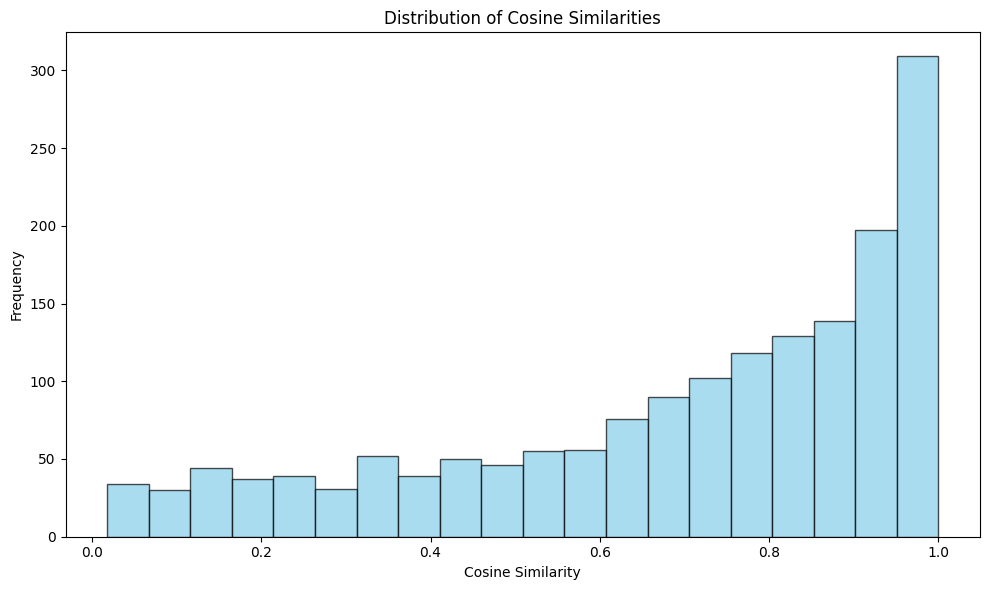

In [22]:

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['cosine_similarity'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Cosine Similarities')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

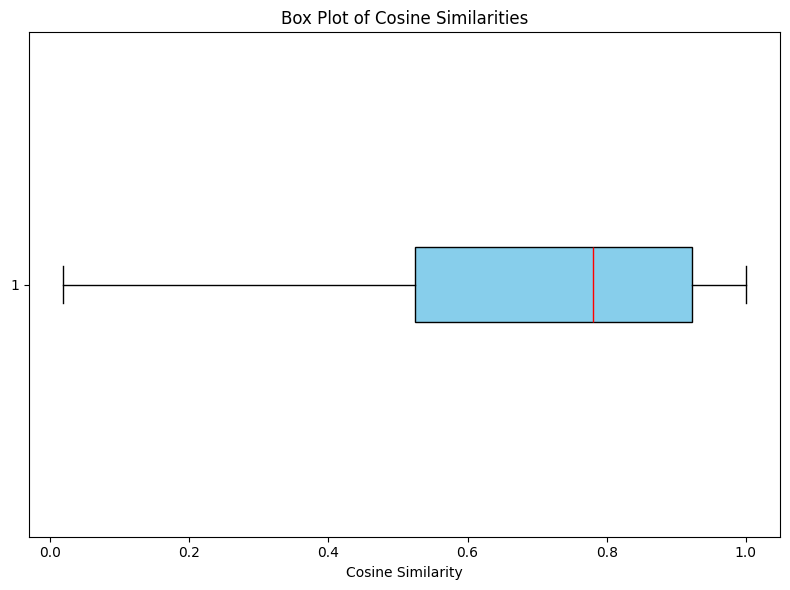

In [23]:
# Box Plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['cosine_similarity'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'))
plt.title('Box Plot of Cosine Similarities')
plt.xlabel('Cosine Similarity')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1156570/3262620473.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['cosine_similarity'], shade=True, color='blue')


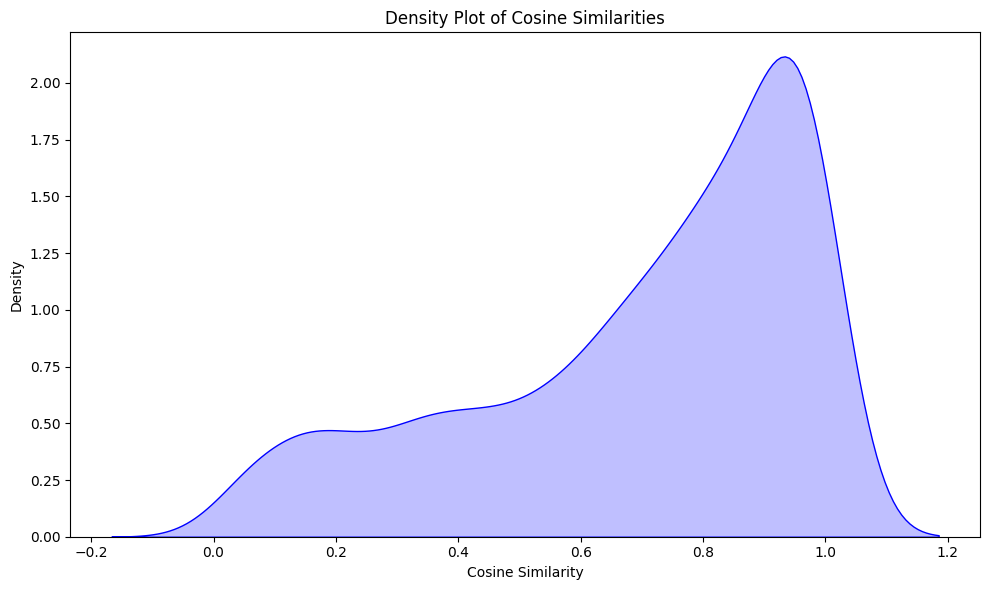

In [24]:
import seaborn as sns

# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['cosine_similarity'], shade=True, color='blue')
plt.title('Density Plot of Cosine Similarities')
plt.xlabel('Cosine Similarity')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

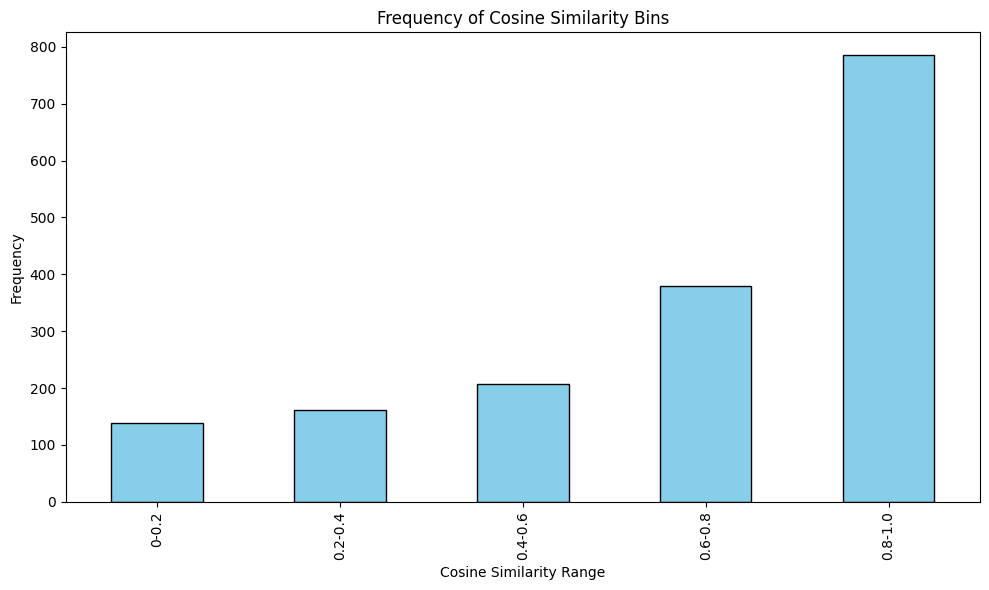

In [25]:
# Bucketing Scores
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
df['similarity_bin'] = pd.cut(df['cosine_similarity'], bins=bins, labels=labels)

# Bar Chart for Binned Similarities
bin_counts = df['similarity_bin'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Cosine Similarity Bins')
plt.xlabel('Cosine Similarity Range')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")


/home/ptyagi/miniconda3/envs/thesis_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ptyagi/miniconda3/envs/thesis_env/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
model.to('cuda:4')

In [13]:
df = pd.read_csv("/work/ptyagi/masterthesis/data/predictions/averaged_predictions.csv")

In [23]:
df["averaged_predictions"][0]

"[('fear', 0.017308233914370762), ('disgust', 0.3955257547477015), ('joy', 0.10216033580302541), ('surprise', 0.024148382040977773), ('sadness', 0.024637331853244474), ('anger', 0.43621996164068005)]"

In [14]:
import os

# Specify the directory containing the files and the list of target IDs
directory_path = '/work/ptyagi/ClimateVisions/Images/2019/02_February'
target_ids = df['conversation_id'].to_list()# Add your list of IDs here

# Initialize a list to store matched file names
matched_files = []



In [15]:
# Iterate over files in the directory
for filename in os.listdir(directory_path):
    # Check if the filename has the expected pattern and extract the ID part
    parts = filename.split('_')
    if len(parts) > 1:
        file_id = parts[1]  # Extract the ID part from the filename
        if int(file_id) in target_ids:
            matched_files.append(filename)

# Print or return matched file names
print("Matched files:", matched_files)

Matched files: ['id_1096408015727742976_2019-02-15.jpg', 'id_1100118750198710273_2019-02-25.jpg', 'id_1100110210197262336_2019-02-25.jpg', 'id_1101177330540662786_2019-02-28.jpg', 'id_1100037692153311233_2019-02-25.jpg', 'id_1100024111642882050_2019-02-25.jpg', 'id_1096400476864688128_2019-02-15.jpg', 'id_1098885909246824449_2019-02-22.jpg', 'id_1096494412455182337_2019-02-15.jpg', 'id_1100154569663733760_2019-02-25.jpg', 'id_1099036514099609601_2019-02-22.jpg', 'id_1099783621609750528_2019-02-24.jpg', 'id_1100417469620072448_2019-02-26.jpg', 'id_1098761097069228032_2019-02-22.jpg', 'id_1096524072874332160_2019-02-15.jpg', 'id_1099999878959321088_2019-02-25.jpg', 'id_1101166904482385921_2019-02-28.jpg', 'id_1100468696487813121_2019-02-26.jpg', 'id_1100339845740851200_2019-02-26.jpg', 'id_1099851581330259970_2019-02-25.jpg', 'id_1099059714476802048_2019-02-22.jpg', 'id_1099582272804716544_2019-02-24.jpg', 'id_1098356556087861248_2019-02-20.jpg', 'id_1100684676723658753_2019-02-27.jpg', 

In [16]:
len(matched_files)

1673

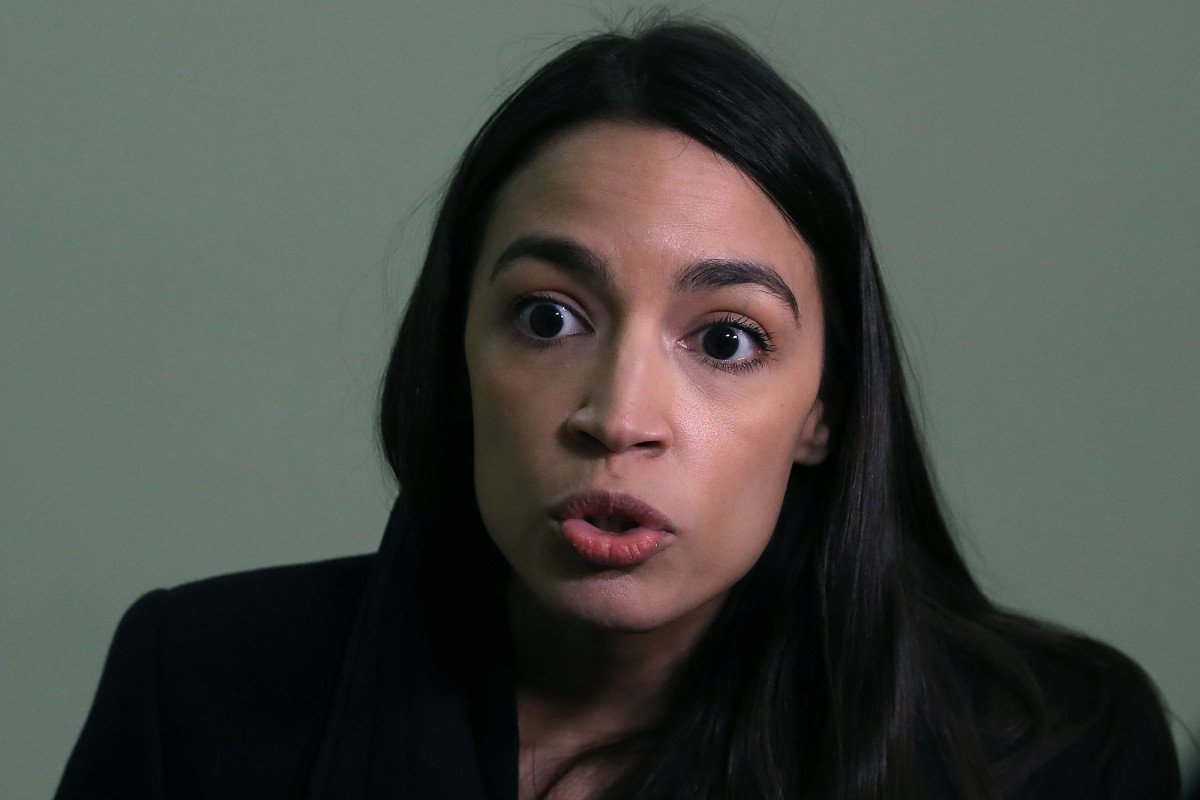

In [ ]:
path = "/work/ptyagi/ClimateVisions/Images/2019/02_February/id_1100118750198710273_2019-02-25.jpg"
image = Image.open(path)
image

In [20]:
candidate_labels=["anger", "surprise", "joy", "disgust", "fear", "sadness"]

candidate_labels = [f'This emotion this photo would invoke in the public is {label}.' for label in candidate_labels]

In [24]:
results = []
for filename in matched_files:
    file_path = os.path.join(directory_path, filename)
    if os.path.exists(file_path):  
        try:
            image = Image.open(file_path)
            inputs = processor(images=image, text=candidate_labels, return_tensors="pt", padding=True)
            inputs.to('cuda:4')
            with torch.no_grad():
                outputs = model(**inputs)

            logits = outputs.logits_per_image[0]
            probs = logits.softmax(dim=-1).cpu().numpy()
            scores = probs.tolist()
            
            results.append([
                {"score": score, "label": candidate_label}
                for score, candidate_label in sorted(zip(probs, candidate_labels), key=lambda x: -x[0])
            ])
            
        except Exception as e:
            print(f"Error processing {filename}: {e}")
    else:
        print(f"File {filename} does not exist in the directory.")

In [26]:
len(results)

1673

In [27]:
def process_data(data):
    processed = []
    for item in data:
        processed_row = [(d['label'].split()[-1][:-1], d['score']) for d in item]
        processed.append(processed_row)
    return processed

# Process the data
processed_data = process_data(results)

In [29]:
df["clip_predictions"] = processed_data

In [42]:
df.to_csv('/work/ptyagi/masterthesis/data/predictions/averaged_predictions.csv', index=False)

In [35]:
df = pd.read_csv("/work/ptyagi/masterthesis/data/predictions/averaged_predictions.csv")

In [36]:
df.head()

,conversation_id,tweet_text,roberta-large-predictions,mapped_predictions,averaged_predictions,cosine_similarity,clip_predictions
0,1091717129995542528,Energy Insider: Exploring the impact of winter...,"[('anticipation', 0.578892707824707), ('sadnes...","[('fear', 0.10359434079474628), ('disgust', 0....","[('fear', 0.017308233914370762), ('disgust', 0...",0.169931,"[('anger', 0.580223), ('disgust', 0.15167378),..."
1,1092776506106015746,Given how what we eat (demand) determines what...,"[('optimism', 0.9701303839683533), ('anticipat...","[('fear', 0.0447722249566507), ('disgust', 0.0...","[('fear', 0.005125462871671195), ('disgust', 0...",0.927457,"[('fear', 0.32951933), ('surprise', 0.24203847..."
2,1092784983998189568,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,"[('anticipation', 0.6292991638183594), ('sadne...","[('fear', 0.03833197220923056), ('disgust', 0....","[('fear', 0.008546253234571035), ('disgust', 0...",0.536289,"[('anger', 0.36482868), ('sadness', 0.2572939)..."
3,1093132427810271233,See how Canada is addressing #ClimateChange th...,"[('optimism', 0.9395819306373596), ('anticipat...","[('fear', 0.019849522251128075), ('disgust', 0...","[('fear', 0.07394002448004584), ('disgust', 0....",0.901251,"[('anger', 0.43142584), ('sadness', 0.28259405..."
4,1094070997135822848,You can kiss your beer goodbye if climate chan...,"[('sadness', 0.45861831307411194), ('disgust',...","[('fear', 0.22188846303966933), ('disgust', 0....","[('fear', 0.026252819823070976), ('disgust', 0...",0.652959,"[('anger', 0.31012434), ('fear', 0.2636976), (..."


In [37]:
df['cosine_similarity_clip'] = df.apply(
    lambda row: calculate_cosine_similarity(
        parse_predictions(row['averaged_predictions']),
        parse_predictions(row['clip_predictions'])
    ),
    axis=1
)

In [38]:
df.head()

,conversation_id,tweet_text,roberta-large-predictions,mapped_predictions,averaged_predictions,cosine_similarity,clip_predictions,cosine_similarity_clip
0,1091717129995542528,Energy Insider: Exploring the impact of winter...,"[('anticipation', 0.578892707824707), ('sadnes...","[('fear', 0.10359434079474628), ('disgust', 0....","[('fear', 0.017308233914370762), ('disgust', 0...",0.169931,"[('anger', 0.580223), ('disgust', 0.15167378),...",0.860258
1,1092776506106015746,Given how what we eat (demand) determines what...,"[('optimism', 0.9701303839683533), ('anticipat...","[('fear', 0.0447722249566507), ('disgust', 0.0...","[('fear', 0.005125462871671195), ('disgust', 0...",0.927457,"[('fear', 0.32951933), ('surprise', 0.24203847...",0.073772
2,1092784983998189568,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,"[('anticipation', 0.6292991638183594), ('sadne...","[('fear', 0.03833197220923056), ('disgust', 0....","[('fear', 0.008546253234571035), ('disgust', 0...",0.536289,"[('anger', 0.36482868), ('sadness', 0.2572939)...",0.212379
3,1093132427810271233,See how Canada is addressing #ClimateChange th...,"[('optimism', 0.9395819306373596), ('anticipat...","[('fear', 0.019849522251128075), ('disgust', 0...","[('fear', 0.07394002448004584), ('disgust', 0....",0.901251,"[('anger', 0.43142584), ('sadness', 0.28259405...",0.341340
4,1094070997135822848,You can kiss your beer goodbye if climate chan...,"[('sadness', 0.45861831307411194), ('disgust',...","[('fear', 0.22188846303966933), ('disgust', 0....","[('fear', 0.026252819823070976), ('disgust', 0...",0.652959,"[('anger', 0.31012434), ('fear', 0.2636976), (...",0.748691


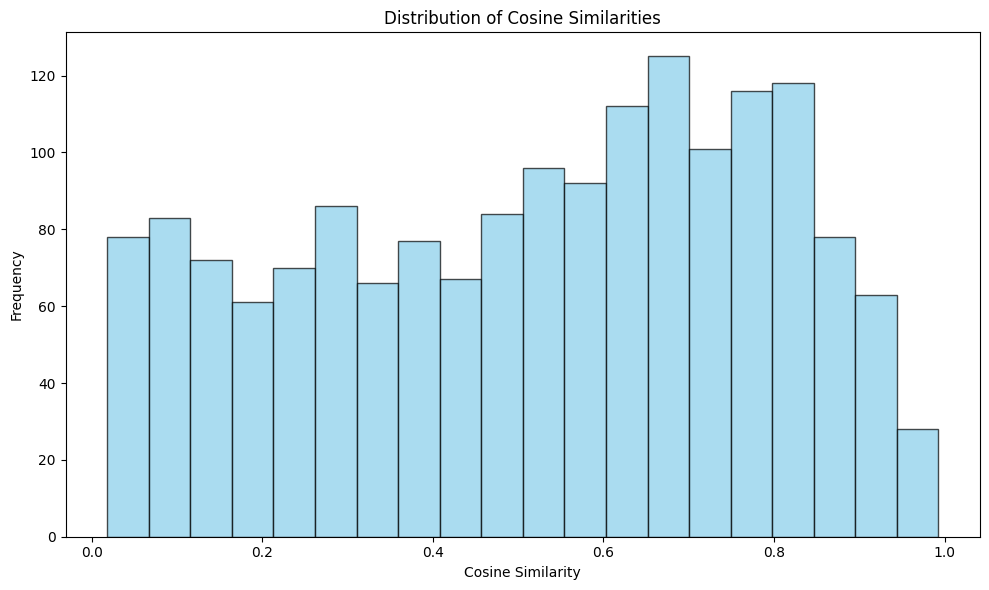

In [40]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['cosine_similarity_clip'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Cosine Similarities')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

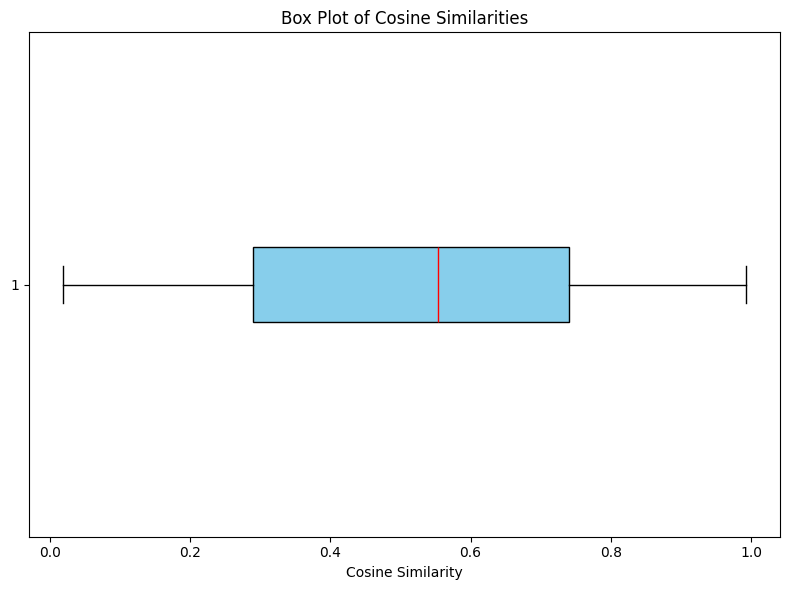

In [41]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['cosine_similarity_clip'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'))
plt.title('Box Plot of Cosine Similarities')
plt.xlabel('Cosine Similarity')
plt.tight_layout()
plt.show()

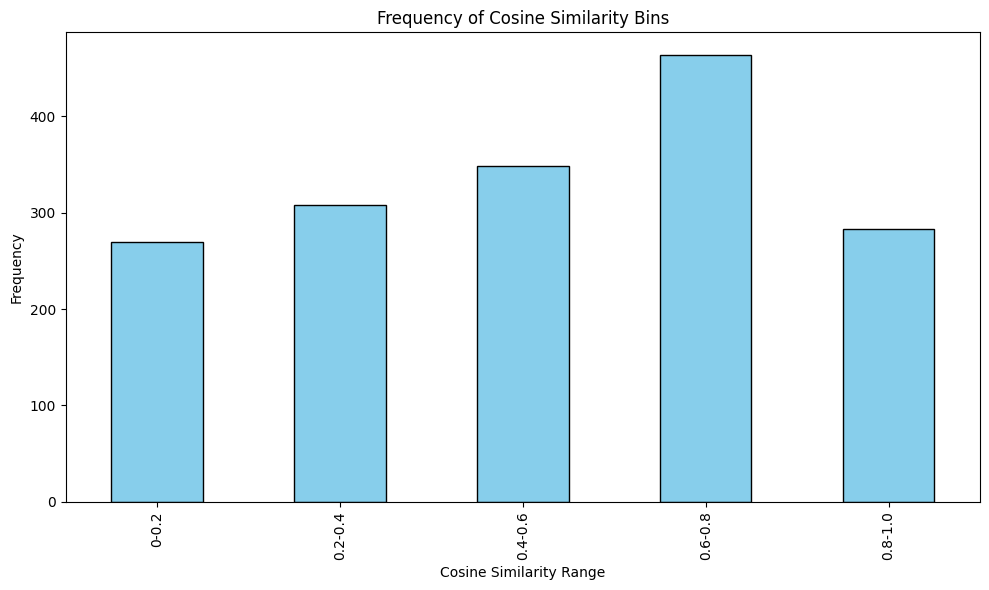

In [43]:
# Bucketing Scores
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
df['similarity_bin'] = pd.cut(df['cosine_similarity_clip'], bins=bins, labels=labels)

# Bar Chart for Binned Similarities
bin_counts = df['similarity_bin'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Cosine Similarity Bins')
plt.xlabel('Cosine Similarity Range')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [44]:
df['cosine_similarity_clip_tweet'] = df.apply(
    lambda row: calculate_cosine_similarity(
        parse_predictions(row['mapped_predictions']),
        parse_predictions(row['clip_predictions'])
    ),
    axis=1
)

In [45]:
df.head()

,conversation_id,tweet_text,roberta-large-predictions,mapped_predictions,averaged_predictions,cosine_similarity,clip_predictions,cosine_similarity_clip,similarity_bin,cosine_similarity_clip_tweet
0,1091717129995542528,Energy Insider: Exploring the impact of winter...,"[('anticipation', 0.578892707824707), ('sadnes...","[('fear', 0.10359434079474628), ('disgust', 0....","[('fear', 0.017308233914370762), ('disgust', 0...",0.169931,"[('anger', 0.580223), ('disgust', 0.15167378),...",0.860258,0.8-1.0,0.237207
1,1092776506106015746,Given how what we eat (demand) determines what...,"[('optimism', 0.9701303839683533), ('anticipat...","[('fear', 0.0447722249566507), ('disgust', 0.0...","[('fear', 0.005125462871671195), ('disgust', 0...",0.927457,"[('fear', 0.32951933), ('surprise', 0.24203847...",0.073772,0-0.2,0.300501
2,1092784983998189568,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,"[('anticipation', 0.6292991638183594), ('sadne...","[('fear', 0.03833197220923056), ('disgust', 0....","[('fear', 0.008546253234571035), ('disgust', 0...",0.536289,"[('anger', 0.36482868), ('sadness', 0.2572939)...",0.212379,0.2-0.4,0.281568
3,1093132427810271233,See how Canada is addressing #ClimateChange th...,"[('optimism', 0.9395819306373596), ('anticipat...","[('fear', 0.019849522251128075), ('disgust', 0...","[('fear', 0.07394002448004584), ('disgust', 0....",0.901251,"[('anger', 0.43142584), ('sadness', 0.28259405...",0.341340,0.2-0.4,0.107704
4,1094070997135822848,You can kiss your beer goodbye if climate chan...,"[('sadness', 0.45861831307411194), ('disgust',...","[('fear', 0.22188846303966933), ('disgust', 0....","[('fear', 0.026252819823070976), ('disgust', 0...",0.652959,"[('anger', 0.31012434), ('fear', 0.2636976), (...",0.748691,0.6-0.8,0.889315


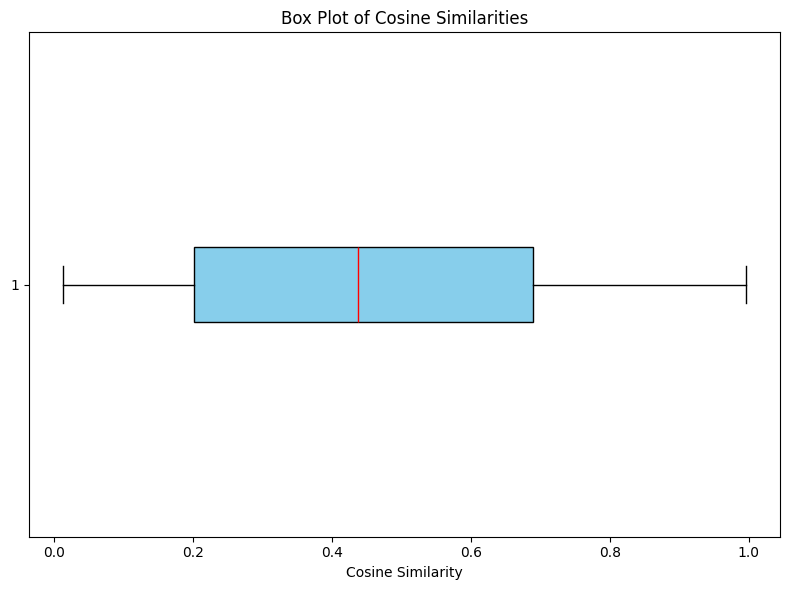

In [46]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['cosine_similarity_clip_tweet'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'))
plt.title('Box Plot of Cosine Similarities')
plt.xlabel('Cosine Similarity')
plt.tight_layout()
plt.show()

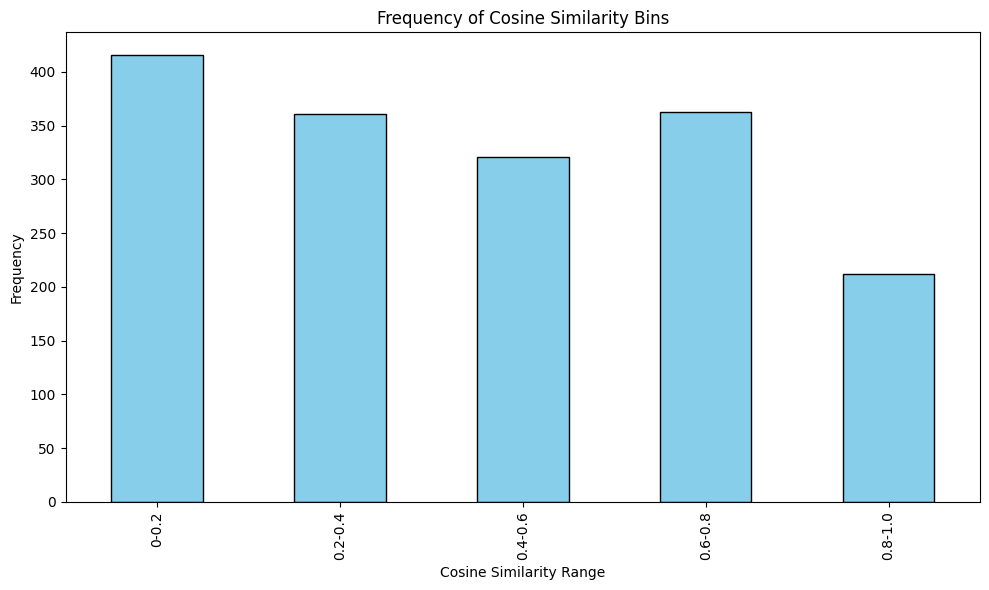

In [47]:
# Bucketing Scores
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
df['similarity_bin'] = pd.cut(df['cosine_similarity_clip_tweet'], bins=bins, labels=labels)

# Bar Chart for Binned Similarities
bin_counts = df['similarity_bin'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Cosine Similarity Bins')
plt.xlabel('Cosine Similarity Range')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [54]:
df.head()

,conversation_id,tweet_text,roberta-large-predictions,mapped_predictions,averaged_predictions,cosine_similarity_tweet_replies,clip_predictions,cosine_similarity_clip_replies,cosine_similarity_clip_tweet
0,1091717129995542528,Energy Insider: Exploring the impact of winter...,"[('anticipation', 0.578892707824707), ('sadnes...","[('fear', 0.10359434079474628), ('disgust', 0....","[('fear', 0.017308233914370762), ('disgust', 0...",0.169931,"[('anger', 0.580223), ('disgust', 0.15167378),...",0.860258,0.237207
1,1092776506106015746,Given how what we eat (demand) determines what...,"[('optimism', 0.9701303839683533), ('anticipat...","[('fear', 0.0447722249566507), ('disgust', 0.0...","[('fear', 0.005125462871671195), ('disgust', 0...",0.927457,"[('fear', 0.32951933), ('surprise', 0.24203847...",0.073772,0.300501
2,1092784983998189568,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,"[('anticipation', 0.6292991638183594), ('sadne...","[('fear', 0.03833197220923056), ('disgust', 0....","[('fear', 0.008546253234571035), ('disgust', 0...",0.536289,"[('anger', 0.36482868), ('sadness', 0.2572939)...",0.212379,0.281568
3,1093132427810271233,See how Canada is addressing #ClimateChange th...,"[('optimism', 0.9395819306373596), ('anticipat...","[('fear', 0.019849522251128075), ('disgust', 0...","[('fear', 0.07394002448004584), ('disgust', 0....",0.901251,"[('anger', 0.43142584), ('sadness', 0.28259405...",0.341340,0.107704
4,1094070997135822848,You can kiss your beer goodbye if climate chan...,"[('sadness', 0.45861831307411194), ('disgust',...","[('fear', 0.22188846303966933), ('disgust', 0....","[('fear', 0.026252819823070976), ('disgust', 0...",0.652959,"[('anger', 0.31012434), ('fear', 0.2636976), (...",0.748691,0.889315


In [ ]:
df.to_csv('/work/ptyagi/masterthesis/data/predictions/averaged_predictions.csv', index=False)

In [62]:
import seaborn as sns

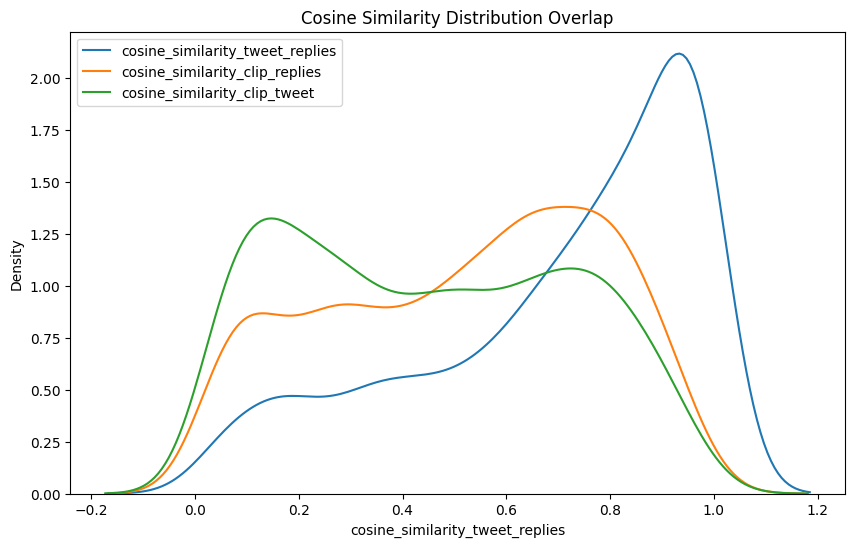

In [69]:
plt.figure(figsize=(10, 6))
for col in ['cosine_similarity_tweet_replies', 'cosine_similarity_clip_replies', 'cosine_similarity_clip_tweet']:
    sns.kdeplot(df[col], label=col)
plt.title('Cosine Similarity Distribution Overlap')
plt.legend()
plt.show()

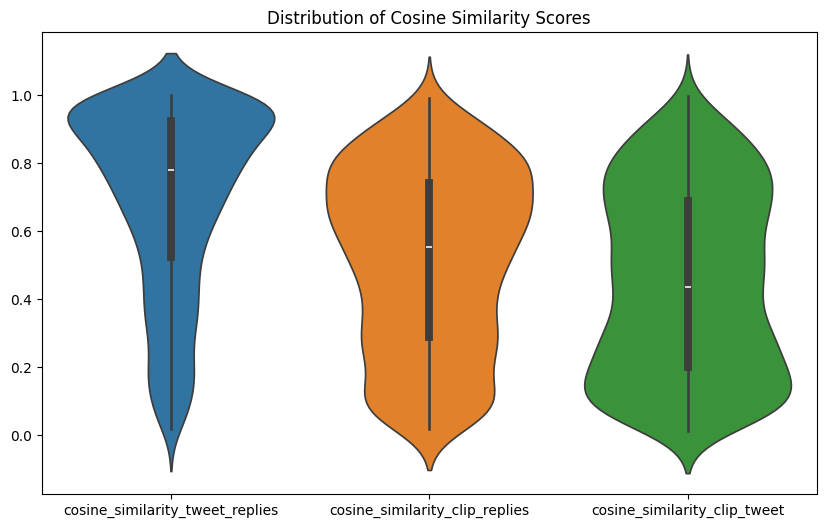

In [67]:
# 1. Violin or Box Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['cosine_similarity_tweet_replies', 'cosine_similarity_clip_replies', 'cosine_similarity_clip_tweet']])
plt.title('Distribution of Cosine Similarity Scores')
plt.show()




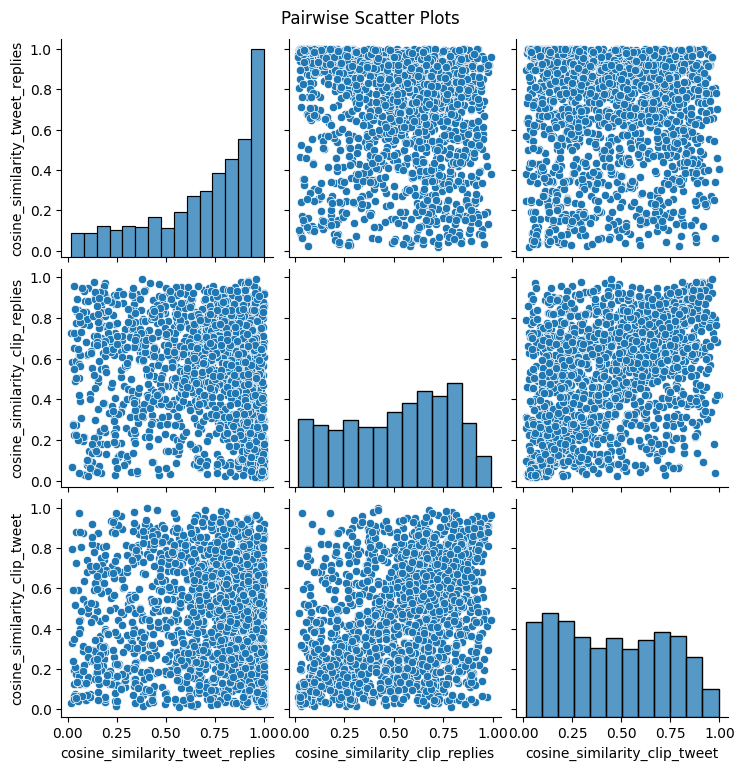

In [68]:
sns.pairplot(df[['cosine_similarity_tweet_replies', 'cosine_similarity_clip_replies', 'cosine_similarity_clip_tweet']])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

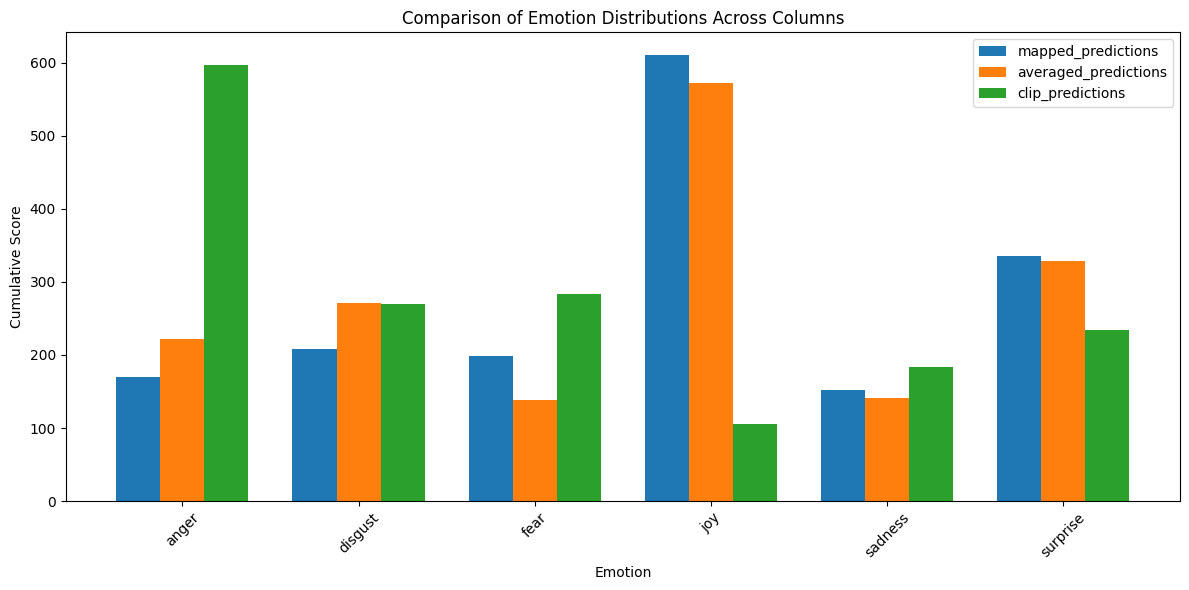

In [20]:

def extract_and_aggregate(predictions_columns):
    aggregated_scores_all = {}
    
    for col_name in predictions_columns:
        # Flatten the list of tuples for all rows in the column
        all_predictions = []
        for mapped_predictions in predictions_columns[col_name]:
            if isinstance(mapped_predictions, str):
                mapped_predictions = eval(mapped_predictions)  # Convert string back to list of tuples if necessary
            all_predictions.extend(mapped_predictions)
        
        # Aggregate scores for each emotion
        aggregated_scores = Counter()
        for emotion, score in all_predictions:
            aggregated_scores[emotion] += score
        
        aggregated_scores_all[col_name] = aggregated_scores
    
    return aggregated_scores_all

# Aggregate predictions from the specified columns
columns_to_compare = ['mapped_predictions', 'averaged_predictions', 'clip_predictions']
aggregated_scores_all = extract_and_aggregate(df[columns_to_compare])

# Prepare data for plotting
emotions_set = set()
for col_scores in aggregated_scores_all.values():
    emotions_set.update(col_scores.keys())

emotions = sorted(emotions_set)  # Sort emotions for consistent order
data = {col: [aggregated_scores_all[col].get(emotion, 0) for emotion in emotions] for col in aggregated_scores_all}

# Plot the distribution for comparison
x = range(len(emotions))
width = 0.25  # Width of each bar

plt.figure(figsize=(12, 6))
for i, col_name in enumerate(columns_to_compare):
    plt.bar([p + i * width for p in x], data[col_name], width=width, label=col_name)

handles = ["tweet_pred", "reply_pred", "clip_pred"]

plt.title('Comparison of Emotion Distributions Across Columns')
plt.xlabel('Emotion')
plt.ylabel('Cumulative Score')
plt.xticks([p + width for p in x], emotions, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [1]:
df

NameError: name 'df' is not defined

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('/work/ptyagi/masterthesis/data/predictions/averaged_predictions.csv')

In [5]:
df.head()

,conversation_id,tweet_text,roberta-large-predictions,mapped_predictions,averaged_predictions,cosine_similarity_tweet_replies,clip_predictions,cosine_similarity_clip_replies,cosine_similarity_clip_tweet
0,1091717129995542528,Energy Insider: Exploring the impact of winter...,"[('anticipation', 0.578892707824707), ('sadnes...","[('fear', 0.10359434079474628), ('disgust', 0....","[('fear', 0.017308233914370762), ('disgust', 0...",0.169931,"[('anger', 0.580223), ('disgust', 0.15167378),...",0.860258,0.237207
1,1092776506106015746,Given how what we eat (demand) determines what...,"[('optimism', 0.9701303839683533), ('anticipat...","[('fear', 0.0447722249566507), ('disgust', 0.0...","[('fear', 0.005125462871671195), ('disgust', 0...",0.927457,"[('fear', 0.32951933), ('surprise', 0.24203847...",0.073772,0.300501
2,1092784983998189568,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,"[('anticipation', 0.6292991638183594), ('sadne...","[('fear', 0.03833197220923056), ('disgust', 0....","[('fear', 0.008546253234571035), ('disgust', 0...",0.536289,"[('anger', 0.36482868), ('sadness', 0.2572939)...",0.212379,0.281568
3,1093132427810271233,See how Canada is addressing #ClimateChange th...,"[('optimism', 0.9395819306373596), ('anticipat...","[('fear', 0.019849522251128075), ('disgust', 0...","[('fear', 0.07394002448004584), ('disgust', 0....",0.901251,"[('anger', 0.43142584), ('sadness', 0.28259405...",0.341340,0.107704
4,1094070997135822848,You can kiss your beer goodbye if climate chan...,"[('sadness', 0.45861831307411194), ('disgust',...","[('fear', 0.22188846303966933), ('disgust', 0....","[('fear', 0.026252819823070976), ('disgust', 0...",0.652959,"[('anger', 0.31012434), ('fear', 0.2636976), (...",0.748691,0.889315
